In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing training_data

In [169]:
data = pd.read_excel(r'C:\Users\aganwani\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

In [170]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Importing test_data

In [171]:
test_data = pd.read_excel(r'C:\Users\aganwani\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [172]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### EDA (Exporlatory Data Analysis)

In [173]:
### Checking size of our dataset
data.shape

(10683, 11)

In our dataset we have 10683 rows and 11 columns.

In [174]:
### Let's check for null values.
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 null values in our dataset one is in route and other in total stop.
Let's locate both the null values.

In [175]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [176]:
data.loc[np.where(data['Route'].isnull()==True)] ## Checking null value location in Route column
data.loc[np.where(data['Total_Stops'].isnull()==True)] ## Checking null value location in Total_Stops column.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Both the NaN values are in same row. we will try to fill this NaN with appropirate data or else we can drop it.

In [177]:
### Let's deal with NaN value.
data.loc[np.where(data['Duration'] == str('23h 40m'))] ### Locating all the data points where duration of flight is equal to23h 40m

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
603,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,07:40 16 Mar,23h 40m,1 stop,In-flight meal not included,9134
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1837,Air India,09/03/2019,Banglore,New Delhi,BLR → GOI → DEL,17:00,16:40 13 Mar,23h 40m,1 stop,No info,9292
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2179,Jet Airways,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 22 Mar,23h 40m,2 stops,No info,9483
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
2776,Jet Airways,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 22 Mar,23h 40m,2 stops,No info,10929


WE can see there are two different files which same duration. Let's group them by Air india and Source and destination.

In [178]:
temp = data.groupby(['Airline','Source','Destination','Duration'])

In [179]:
temp.get_group(('Air India','Delhi','Cochin','23h 40m'))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
3272,Air India,27/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Mar,23h 40m,2 stops,No info,7090
3595,Air India,18/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 19 May,23h 40m,1 stop,No info,8372
4280,Air India,1/04/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 02 Apr,23h 40m,1 stop,No info,5117
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480


Here we have 2 different flight,s route with same time duration. Lets take a mode value to fillna.

In [180]:
temp.get_group(('Air India','Delhi','Cochin','23h 40m')).mode()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air India,12/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Mar,23h 40m,2 stops,No info,10975.0
1,NaN,15/05/2019,NaN,NaN,NaN,NaN,09:25 10 Jun,NaN,NaN,NaN,NaN
2,NaN,18/05/2019,NaN,NaN,NaN,NaN,09:25 13 Jun,NaN,NaN,NaN,NaN
3,NaN,21/03/2019,NaN,NaN,NaN,NaN,09:25 16 May,NaN,NaN,NaN,NaN
4,NaN,27/03/2019,NaN,NaN,NaN,NaN,09:25 19 May,NaN,NaN,NaN,NaN
5,NaN,27/06/2019,NaN,NaN,NaN,NaN,09:25 22 Mar,NaN,NaN,NaN,NaN
6,NaN,3/03/2019,NaN,NaN,NaN,NaN,09:25 28 Jun,NaN,NaN,NaN,NaN
7,NaN,9/06/2019,NaN,NaN,NaN,NaN,09:25 28 Mar,NaN,NaN,NaN,NaN


We could use route value as DEL → HYD → MAA → COK and for total stops 2stops.

In [181]:
data['Route'].fillna(value='DEL → HYD → MAA → COK',inplace=True)
data['Total_Stops'].fillna(value='2 stops',inplace=True)

In [182]:
data.iloc[9039]

Airline                        Air India
Date_of_Journey                6/05/2019
Source                             Delhi
Destination                       Cochin
Route              DEL → HYD → MAA → COK
Dep_Time                           09:45
Arrival_Time                09:25 07 May
Duration                         23h 40m
Total_Stops                      2 stops
Additional_Info                  No info
Price                               7480
Name: 9039, dtype: object

NaN value is filled with appropriate value.

In [183]:
### Checking unique class in Additional_Info column.
data['Additional_Info'].value_counts().unique

<bound method Series.unique of No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64>

In [184]:
### Let's merge 1 Long layover, Change airports, Business class, 1 Short layover, 2 Long layover, Red-eye flight
data["Additional_Info"].replace({'Change airports':'Other', 'Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other','2 Long layover':'Other','1 Long layover':'Other','No Info':'No info'},inplace=True) 
                                       
test_data["Additional_Info"].replace({'Change airports':'Other','Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other','2 Long layover':'Other','1 Long layover':'Other','No Info':'No info'},inplace=True)

We have merge 1 Long layover, Change airports, Business class, 1 Short layover, 2 Long layover, Red-eye flight  data points in one group other

In [185]:
### Checking basic info of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


From above information we can see only Target variable is in Int64, rest all the features are object dtype.

In [186]:
### Let's split Date_of_Journey column into day month and year.
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month

In [187]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [188]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [189]:
### Let's split Date_of_Journey column into day month and year for test data as well.
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data['Day'] = test_data['Date_of_Journey'].dt.day
test_data['Month'] = test_data['Date_of_Journey'].dt.month

In [190]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [191]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


We have converted date of journey column into Days and months

In [192]:
### Removing extra data from Arrival time for train data
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]

### Removing extra data from Arrival time for test data 
test_data['Arrival_Time']=test_data['Arrival_Time'].str.split(' ').str[0]

In [193]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [194]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,non-stop,No info,24,6


Removed extra data from Arrival_Time column for both training and testing data

In [195]:
### Converting Arrival time into hours and minutes for train data
data['Arrival_Hour'] = data['Arrival_Time'].str.split(':').str[0]
data['Arrival_Minute'] = data['Arrival_Time'].str.split(':').str[1]
data['Arrival_Hour']=data['Arrival_Hour'].astype(int)
data['Arrival_Minute']=data['Arrival_Minute'].astype(int)
data=data.drop(['Arrival_Time'],axis=1)

### Converting Arrival time into hours and minutes for test data
test_data['Arrival_Hour'] = test_data['Arrival_Time'].str.split(':').str[0]
test_data['Arrival_Minute'] = test_data['Arrival_Time'].str.split(':').str[1]
test_data['Arrival_Hour']=test_data['Arrival_Hour'].astype(int)
test_data['Arrival_Minute']=test_data['Arrival_Minute'].astype(int)
test_data=test_data.drop(['Arrival_Time'],axis=1)

In [196]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,6,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,5,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,3,1,21,35


In [197]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Day,Month,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,5,12,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2,45


Extracted arrival time into hours and minutes from arrival column and droped it.

In [198]:
### Converting Departure time into hours and minute for train data
data['Departure_Hour'] = data['Dep_Time'] .str.split(':').str[0]
data['Departure_Minute'] = data['Dep_Time'] .str.split(':').str[1]
data['Departure_Hour']=data['Departure_Hour'].astype(int)
data['Departure_Minute']=data['Departure_Minute'].astype(int)
data=data.drop(['Dep_Time'],axis=1)

### Converting Departure time into hours and minute for test data.
test_data['Departure_Hour'] = test_data['Dep_Time'] .str.split(':').str[0]
test_data['Departure_Minute'] = test_data['Dep_Time'] .str.split(':').str[1]
test_data['Departure_Hour']=test_data['Departure_Hour'].astype(int)
test_data['Departure_Minute']=test_data['Departure_Minute'].astype(int)
test_data=test_data.drop(['Dep_Time'],axis=1)

In [199]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [200]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


Extracted Departure time into hours and minutes from Departure_time column and droped it.

In [201]:
### Let's check statisti`cal data description.
data.describe()

,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,13.348778,24.690630,12.490686,24.411214
std,4611.359167,8.803701,2.987489,6.859125,16.506036,5.748650,18.767980
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,10.000000,8.000000,5.000000
50%,8372.000000,6.000000,5.000000,14.000000,25.000000,11.000000,25.000000
75%,12373.000000,21.000000,6.000000,19.000000,35.000000,18.000000,40.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


It looks like Arrival time and departure both contain zero value. which is for 12AM

#### (i) Univariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='count'>

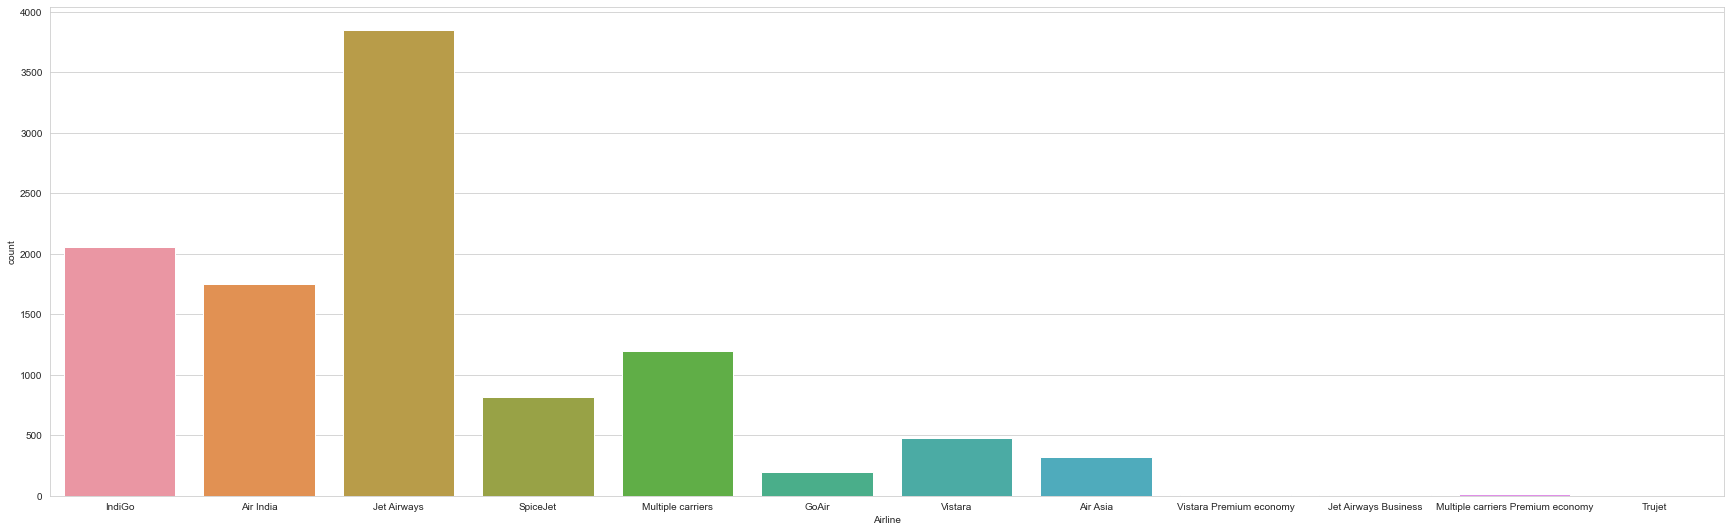

In [202]:
plt.figure(figsize=(30,9))
sns.countplot(x='Airline',data=data)

 From above graph we can see that Jet Airways and IndiGo has more numbers of flights are compare to other flights.

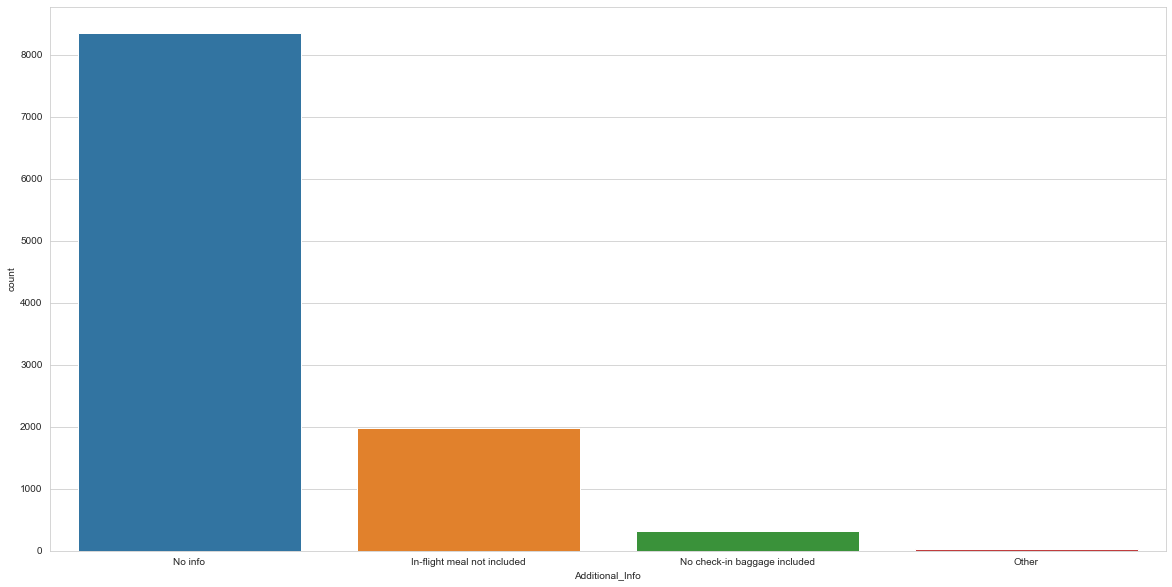

In [203]:
plt.figure(figsize=(20,10))
sns.countplot(x='Additional_Info',data=data)
plt.show()

In [204]:
data['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Other                             33
Name: Additional_Info, dtype: int64

<bound method Series.unique of 1 stop      5625
non-stop    3491
2 stops     1521
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64>


<Figure size 2160x720 with 0 Axes>

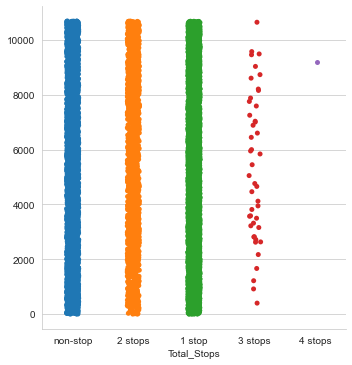

In [205]:
print(data['Total_Stops'].value_counts().unique)
plt.figure(figsize=(30,10))
sns.catplot(x='Total_Stops',y=data.index,data=data)
plt.show()

From above plot we can see there are very less flights which took 3 stops as compare to nonstop,2 stops and 1 stop.
Whereas there is only one light which took 4 stops.

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month, dtype: int64


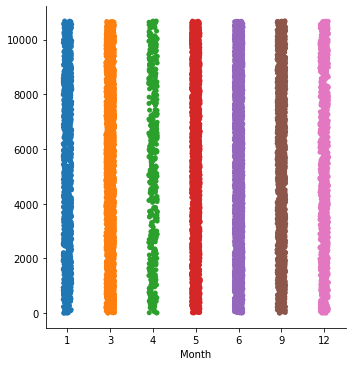

In [28]:
sns.catplot(x='Month',y=data.index,data=data)
print(data['Month'].value_counts())

 This graph shows that the maximum number of flight are travelled in Month of June. Where as min number of flights were travled in the month of April.

<AxesSubplot:ylabel='Route'>

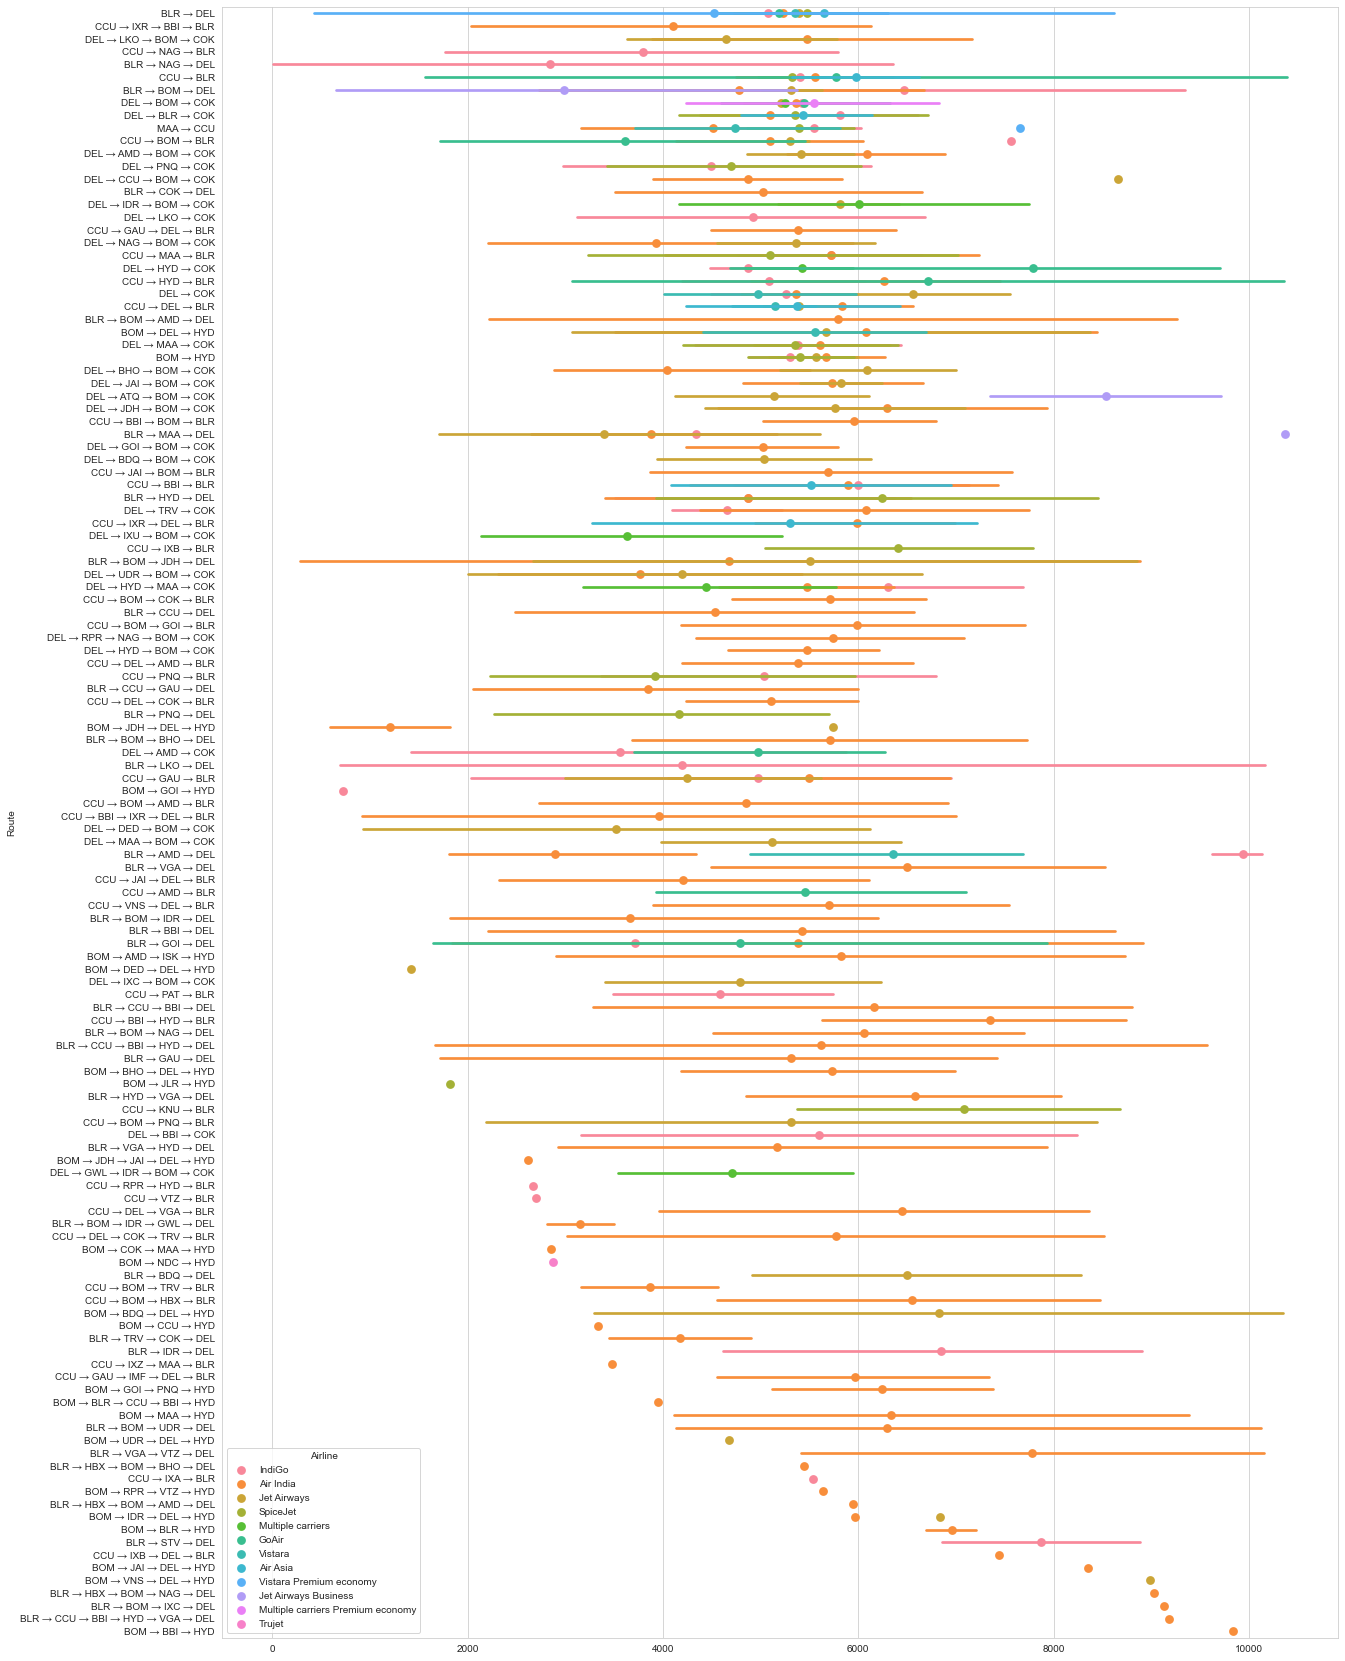

In [29]:
plt.figure(figsize=(20,30))
sns.set_style('whitegrid')
sns.pointplot(x=data.index,y='Route',data=data, hue='Airline',join=False)

This above point plots shows the number of flights travel on same route.

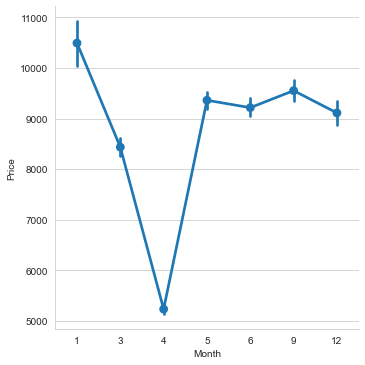

In [30]:
sns.catplot(x = 'Month',y = 'Price',data=data, kind="point")

We can see there is rapid price drop between 1st month and 4 month, After that in 5th month price raise again.

#### (ii) Bivariate Analysis

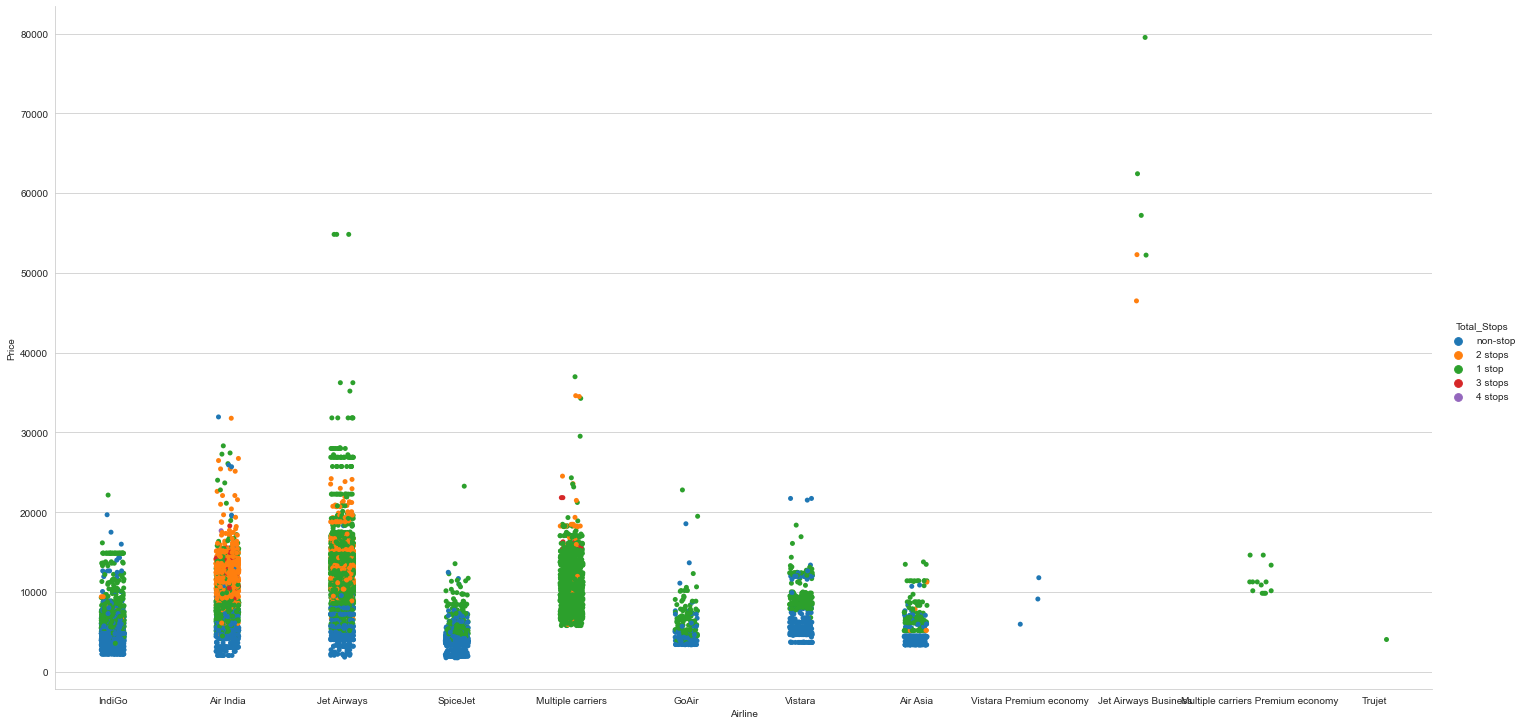

In [129]:
sns.catplot(x='Airline',y='Price',data=data,hue='Total_Stops',height=10, aspect=2)

We can see maximun flights are 1 stop flights.
Also max 2 stops flights are run by Air india.
The highest price is for jet airways business class.
We have only one entry for Trujet flight.

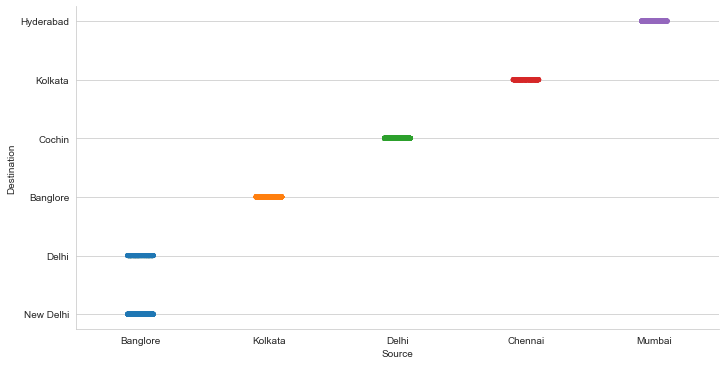

In [33]:
sns.catplot(x='Source',y='Destination',data=data,height=5,aspect=2)

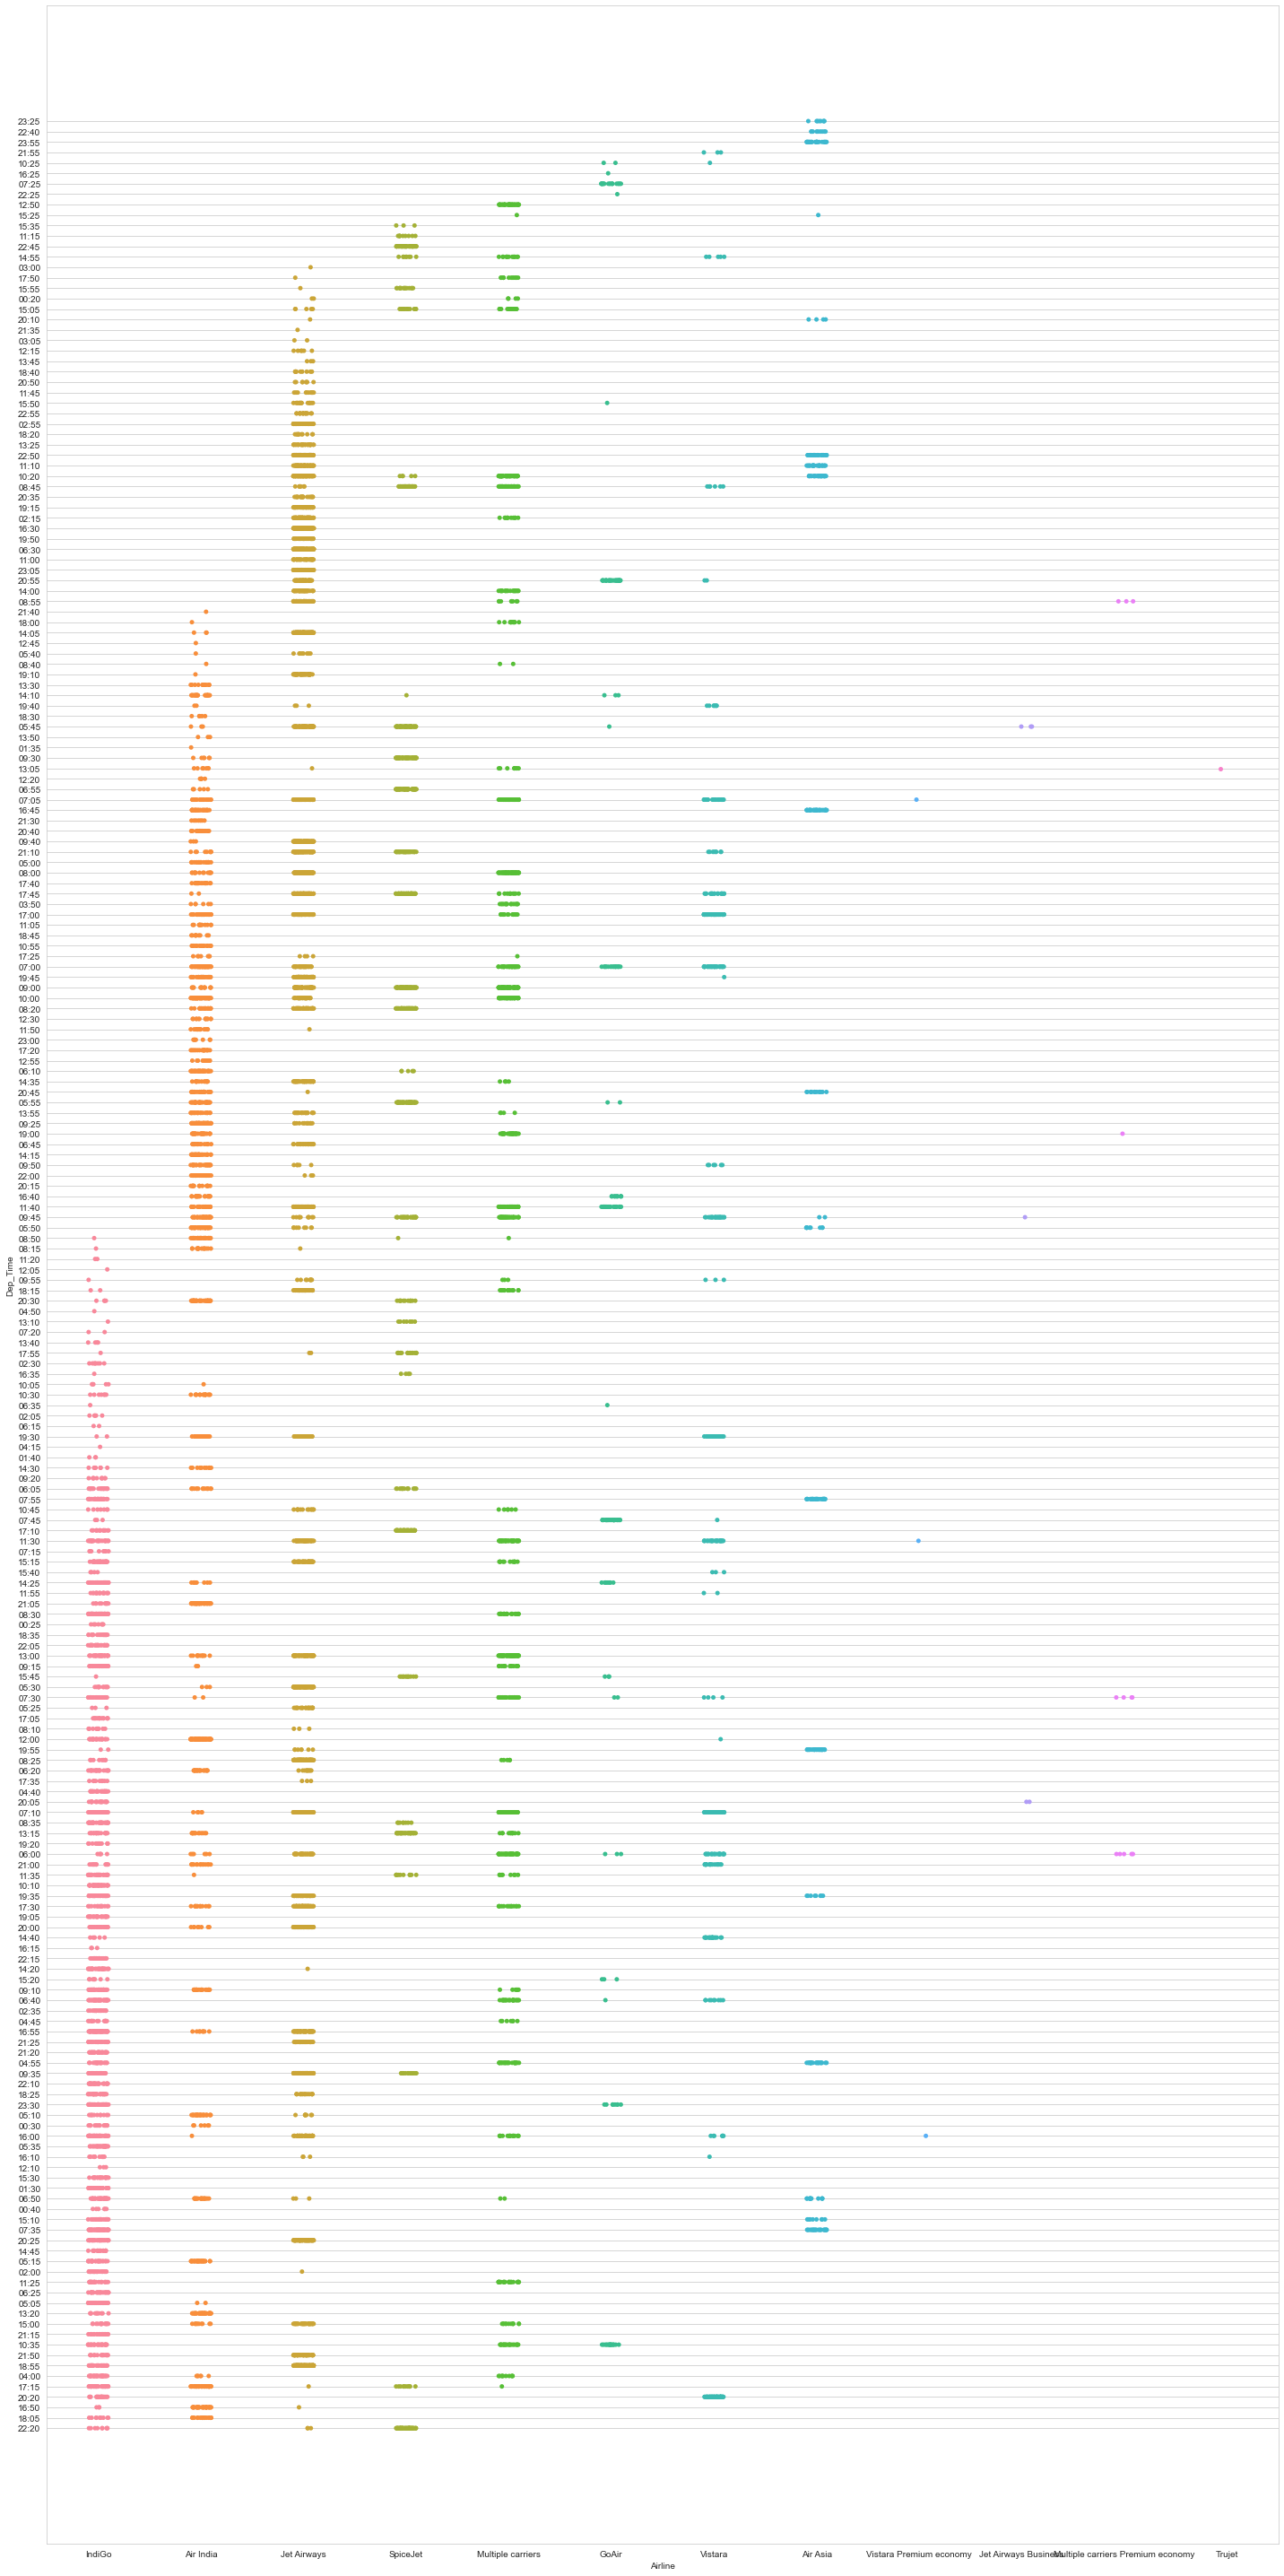

In [37]:
plt.figure(figsize=(20,40))
sns.stripplot(x='Airline',y='Dep_Time',data=data)
plt.tight_layout()

<AxesSubplot:xlabel='Day', ylabel='Month'>

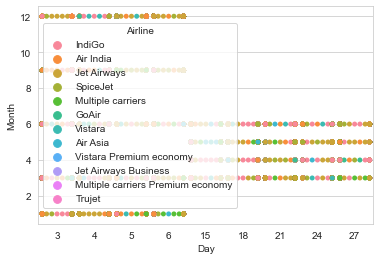

In [39]:
sns.swarmplot(x="Day",y="Month",data=data,hue="Airline")

Its shows that max flights fly during month 4 and 6

### (iii) Multivariate Analysis

Before performing multivariate analysis lets convert all the catagorical columns data into Int64

In [206]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1521
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [207]:
data['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4],inplace=True)

In [208]:
cols = ['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Additional_Info']

In [209]:
from sklearn.preprocessing import LabelEncoder ### Importing label encoder to convert catagorical data in integer.
l_enc = LabelEncoder() ### Intantiating Label encoder.
data[cols] = data[cols].apply(l_enc.fit_transform) ### Fit and transforming data.

In [210]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,3,0,5,18,240,0,2,3897,24,3,1,10,22,20
1,1,3,0,84,336,2,2,7662,5,1,13,15,5,50
2,4,2,1,118,106,2,2,13882,6,9,4,25,9,25
3,3,3,0,91,311,1,2,6218,5,12,23,30,18,5
4,3,0,5,29,303,1,2,13302,3,1,21,35,16,50


In [211]:
### Applying same for test_data.
test_data['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4],inplace=True)
test_data[cols] = test_data[cols].apply(l_enc.fit_transform) ### Fit and transforming data.
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,4,2,1,76,10,1,2,6,6,4,25,17,30
1,3,3,0,65,248,1,2,5,12,10,20,6,20
2,4,2,1,76,148,1,0,21,5,19,0,19,15
3,6,2,1,76,36,1,2,21,5,21,0,8,0
4,0,0,2,16,216,0,2,24,6,2,45,23,55


<AxesSubplot:>

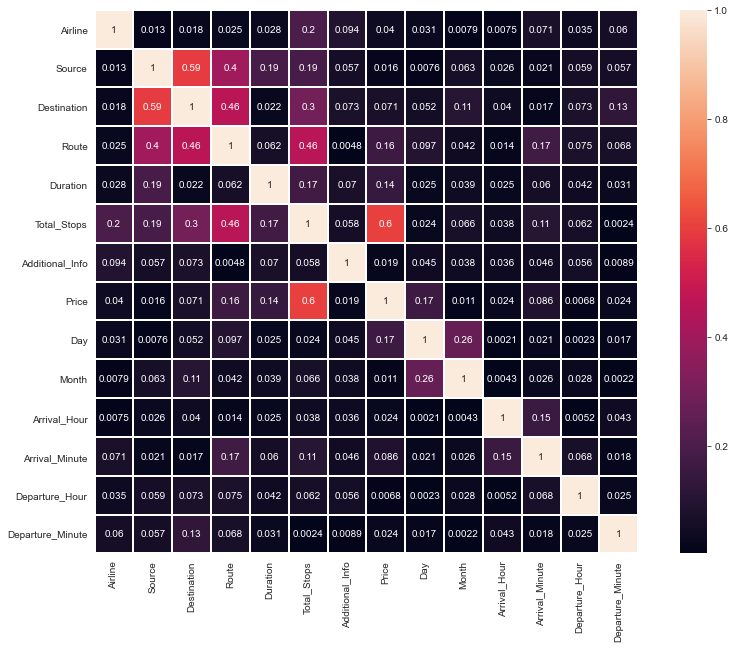

In [212]:
### Let's plot heatmap to check correlationship between columns.
data_corr = data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

We can see Total stop is showing 60% relationship with target variable.

### Pre-Processing

In [215]:
### Let's have look on our dataset again.
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,3,0,5,18,240,0,2,3897,24,3,1,10,22,20
1,1,3,0,84,336,2,2,7662,5,1,13,15,5,50
2,4,2,1,118,106,2,2,13882,6,9,4,25,9,25
3,3,3,0,91,311,1,2,6218,5,12,23,30,18,5
4,3,0,5,29,303,1,2,13302,3,1,21,35,16,50


In [216]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,4,2,1,76,10,1,2,6,6,4,25,17,30
1,3,3,0,65,248,1,2,5,12,10,20,6,20
2,4,2,1,76,148,1,0,21,5,19,0,19,15
3,6,2,1,76,36,1,2,21,5,21,0,8,0
4,0,0,2,16,216,0,2,24,6,2,45,23,55


In [217]:
### seprating Price from training data and storing it in y.
X =  data.drop('Price',axis=1)
y = data['Price']

### Scaling (Standardization)

In [221]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(X)
print('Our X data is now scaled now stored in x_scaled')

Our X data is now scaled now stored in x_scaled


### Train - Test Split

In [223]:
# Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [225]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8012, 13) (8012,) (2671, 13) (2671,)


### Finding Best Model

In [230]:
### Importing models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

### Importing Evalution matrices.
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [244]:
### Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [236]:
### Knn Regressor 
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_kn_pred = knn.predict(x_test) #Pridicting x_test data

In [237]:
### DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred = dtr.predict(x_test) #Pridicting x_test data

In [238]:
### RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred = rfr.predict(x_test) #Pridicting x_test data

In [239]:
### SVR
svr = SVR()
svr.fit(x_train,y_train)
y_svr_pred = svr.predict(x_test) #Pridicting x_test data

In [241]:
### SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_sgd_pred = sgd.predict(x_test) #Pridicting x_test data

### Checking Evalution Metrics and cross validation for all the models.

In [245]:
print('R2 score for Linear regression = ',r2_score(y_test,y_lr_pred))
print('R2 score for KNeighborsRegressor = ',r2_score(y_test,y_kn_pred))
print('R2 score for DecisionTreeRegressor = ',r2_score(y_test,y_dtr_pred))
print('R2 score for RandomForestRegressor = ',r2_score(y_test,y_rfr_pred))
print('R2 score for SVR = ',r2_score(y_test,y_svr_pred))
print('R2 score for SGDRegressor = ',r2_score(y_test,y_sgd_pred))

R2 score for Linear regression =  0.4103754814195464
R2 score for KNeighborsRegressor =  0.7028981709882492
R2 score for DecisionTreeRegressor =  0.766825683661993
R2 score for RandomForestRegressor =  0.862282876453583
R2 score for SVR =  0.01595862803618775
R2 score for SGDRegressor =  0.4104731332161188


In [246]:
print('CV score for Linear regression = ',cross_val_score(lr,x,y,cv=5).mean())
print('CV score for KNeighborsRegressor = ',cross_val_score(knn,x,y,cv=5).mean())
print('CV score for DecisionTreeRegressor = ',cross_val_score(dtr,x,y,cv=5).mean())
print('CV score for RandomForestRegressor = ',cross_val_score(rfr,x,y,cv=5).mean())
print('CV score for SVR = ',cross_val_score(svr,x,y,cv=5).mean())
print('CV score for SGDRegressor = ',cross_val_score(sgd,x,y,cv=5).mean())

CV score for Linear regression =  0.4275274811210988
CV score for KNeighborsRegressor =  0.7402221360661793
CV score for DecisionTreeRegressor =  0.7975246634619074
CV score for RandomForestRegressor =  0.8909392224323639
CV score for SVR =  0.02041360679625972
CV score for SGDRegressor =  0.42630429953324683


#### From the above R2 score and CV score we can see Random Forest is best model for this problem

### Performing Hyper Parameter tuning.

In [250]:
from sklearn.model_selection import RandomizedSearchCV

In [249]:
Randomized_search = RandomizedSearchCV(estimator=rfr,param_distributions = params,cv=5,n_jobs=-1)
Randomized_search.fit(x_train,y_train)

KeyboardInterrupt: 